# Example of clustering - image posterization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans

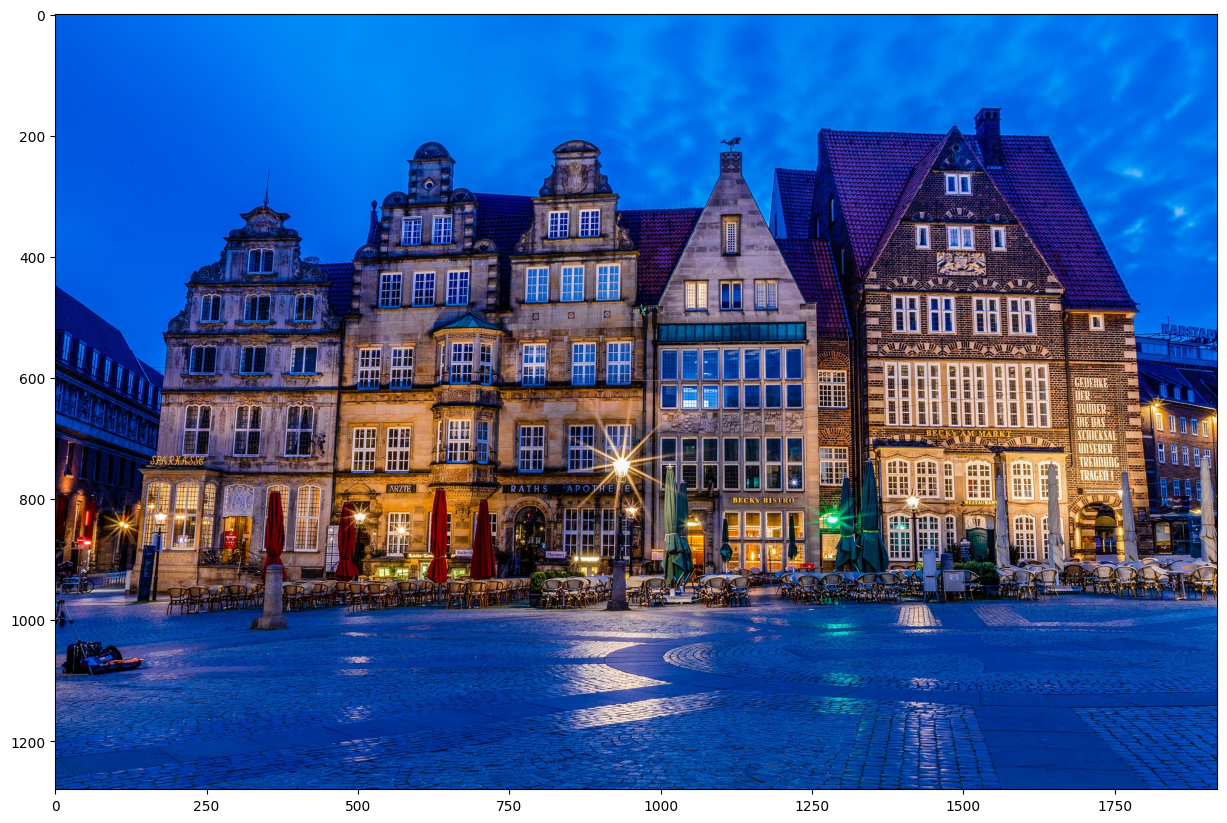

In [2]:
image = imread('data/sample_picture1.jpg')

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

In [3]:
all_pixels = image.reshape((-1,3))
unique_pixels = np.unique(all_pixels, axis=0)

all_pixels.shape, unique_pixels.shape, 256 ** 3

((2457600, 3), (406522, 3), 16777216)

In [10]:
NUMBER_OF_COLORS = 10

estimator = KMeans(n_clusters=NUMBER_OF_COLORS)
estimator.fit(all_pixels)

C:\Users\matou\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [6]:
estimator.cluster_centers_

array([[  1.47186473, 115.23610871, 235.34624814],
       [141.11817206,  96.99039941,  65.78868196],
       [ 12.22702444,  27.50246196,  96.53140213],
       [  7.95121421,  61.89455974, 153.45174976],
       [221.69555432, 201.93695849, 199.53501153],
       [ 18.31890035,  10.40379712,  23.26703207],
       [143.30011269, 131.41801266, 158.24364788],
       [ 86.87036557,  83.90779587, 131.38476314],
       [205.27612888, 149.95514245, 100.9128343 ],
       [ 78.68756343,  49.30833819,  43.24098938]])

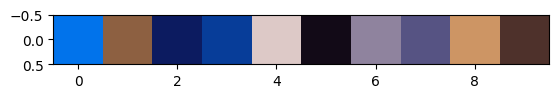

In [7]:
plt.imshow(estimator.cluster_centers_.reshape(1, NUMBER_OF_COLORS, 3) / 255)
plt.show()

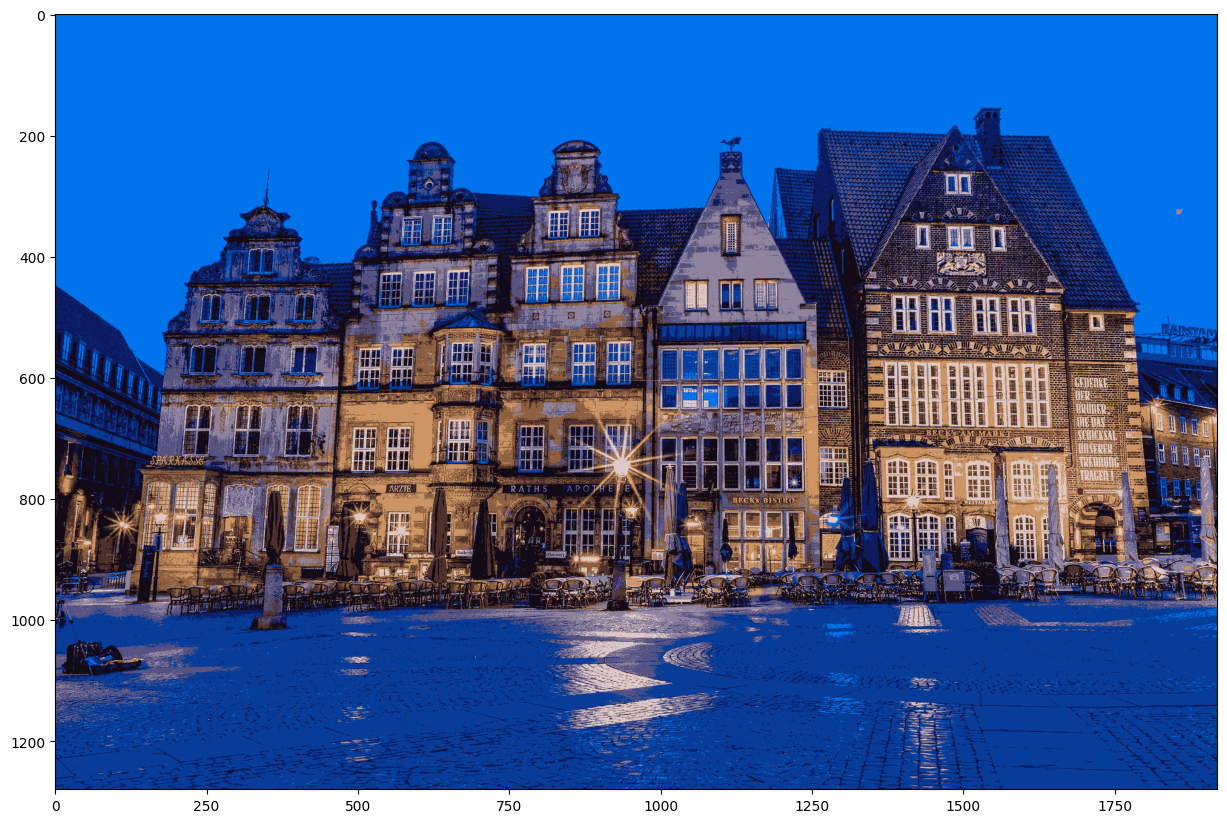

In [8]:
labels = estimator.predict(all_pixels)

new_pixels = estimator.cluster_centers_[labels]

new_image = new_pixels.reshape(image.shape)

plt.figure(figsize=(15,15))
plt.imshow(new_image / 255)
plt.show()

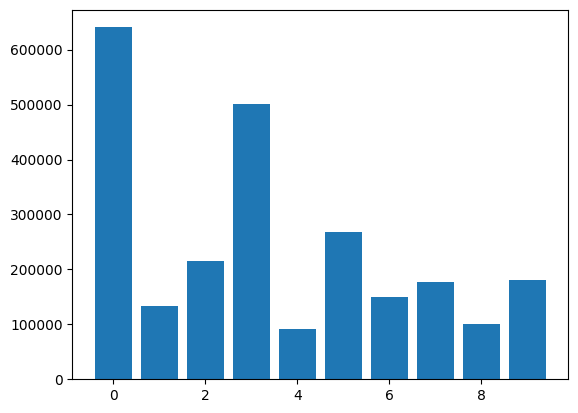

In [9]:
x, y = np.unique(labels, return_counts=True)
plt.bar(x, y)
plt.show()